# COVID-19 Data Analysis Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
dataset.shape

(266, 104)

In [4]:
df = dataset.drop(["Lat", "Long"], axis= 1, inplace = True)

In [5]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 101)

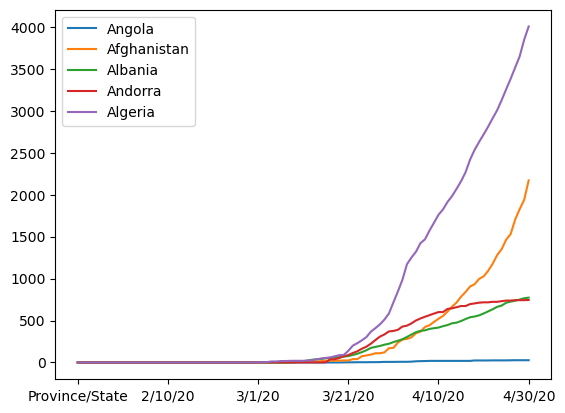

In [9]:
corona_dataset_aggregated.loc["Angola"].plot()
corona_dataset_aggregated.loc["Afghanistan"].plot()
corona_dataset_aggregated.loc["Albania"].plot()
corona_dataset_aggregated.loc["Andorra"].plot()
corona_dataset_aggregated.loc["Algeria"].plot()
plt.legend()

<Axes: >

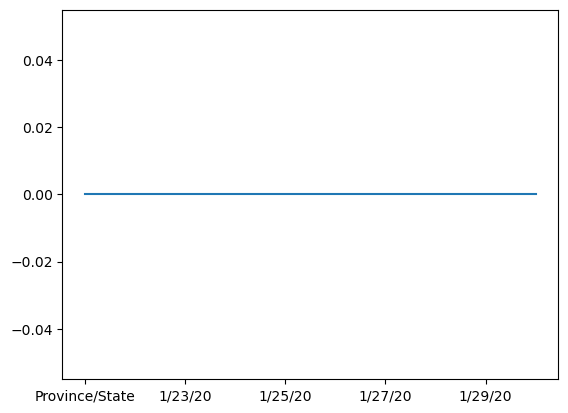

In [10]:
corona_dataset_aggregated.loc["Angola"][:10].plot()

<Axes: >

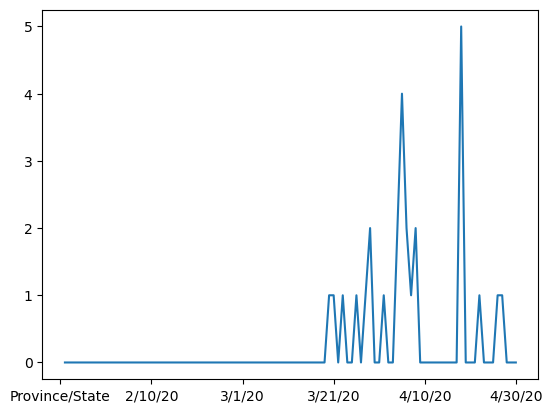

In [11]:
corona_dataset_aggregated.loc["Angola"].diff().plot()

In [12]:
corona_dataset_aggregated.loc["Angola"].diff().max()

5

In [13]:
corona_dataset_aggregated.loc["Afghanistan"].diff().max()

232

In [14]:
corona_dataset_aggregated.loc["Albania"].diff().max()

34

In [15]:
corona_dataset_aggregated.loc["Andorra"].diff().max()

43

In [16]:
corona_dataset_aggregated.loc["Algeria"].diff().max()

199

In [20]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    # Convert the row to numeric before taking the difference
    row_data = pd.to_numeric(corona_dataset_aggregated.loc[c], errors='coerce')
    max_infection_rates.append(row_data.diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates


In [21]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [22]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [23]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [24]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [25]:
useless_cols = ["Overall rank", "Score","Generosity","Perceptions of corruption"]

In [26]:
happiness_report.drop(useless_cols, axis = 1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [27]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [29]:
corona_data.shape

(187, 1)

In [30]:
happiness_report.shape

(156, 4)

In [31]:
data = corona_data.join(happiness_report, how = "inner")

In [32]:
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [33]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [34]:
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

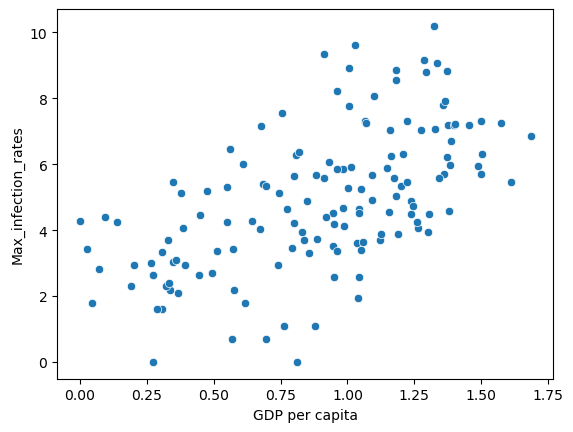

In [42]:
x = data["GDP per capita"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

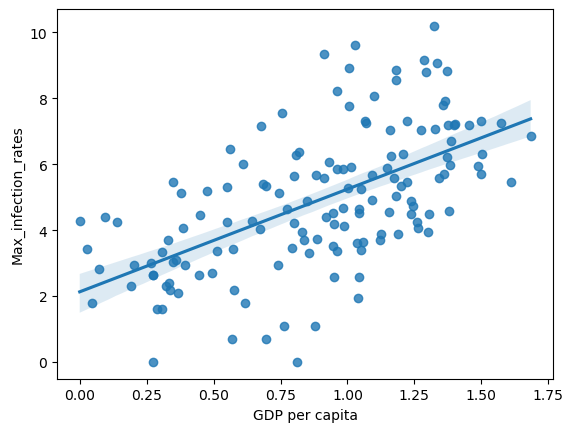

In [43]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

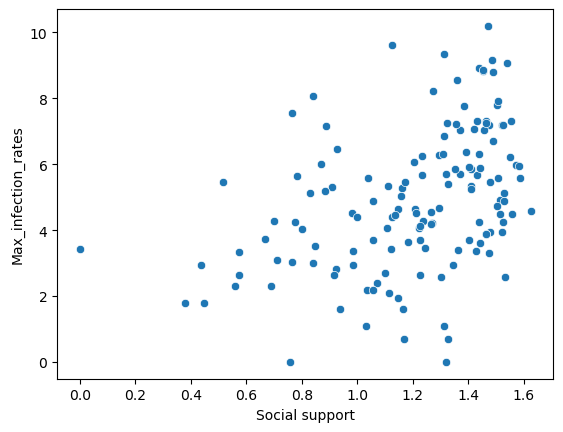

In [44]:
x = data["Social support"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

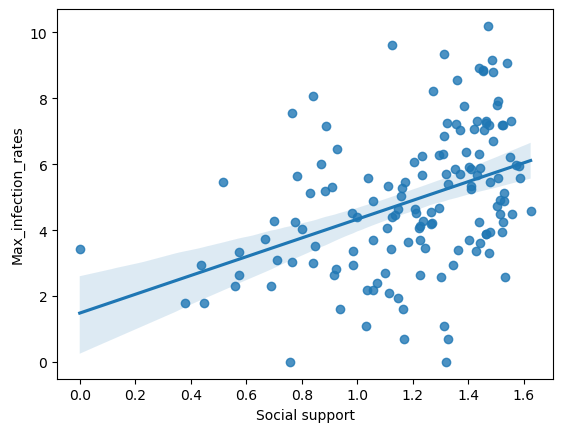

In [45]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

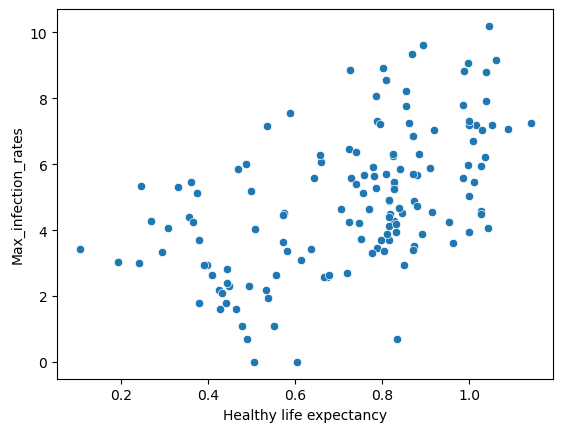

In [46]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

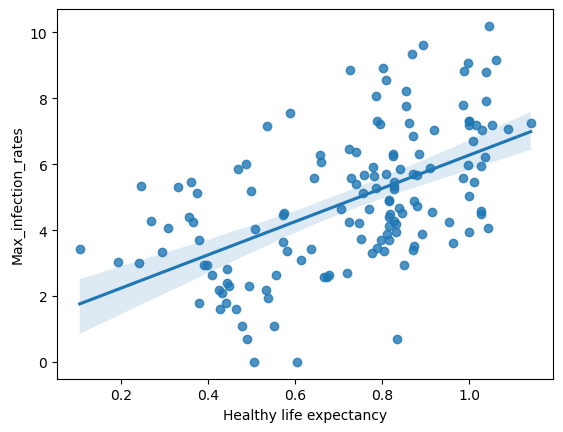

In [47]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

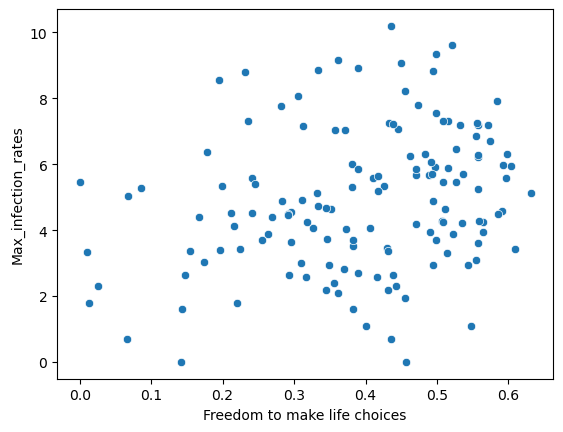

In [48]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

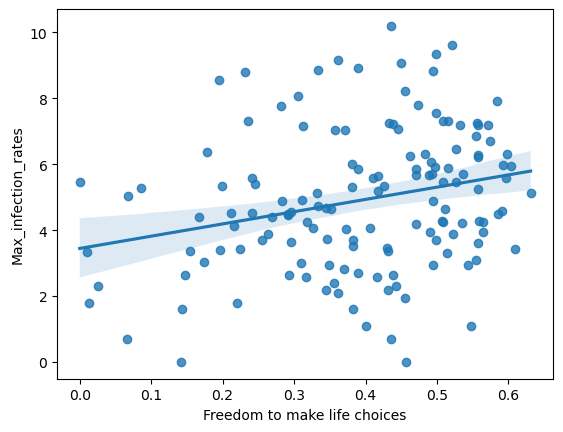

In [49]:
sns.regplot(x=x, y=np.log(y))